In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
rb_ratings = pd.read_csv('ratings.csv')
rb_ratings.date = pd.to_datetime(rb_ratings.date, unit='s')
rb_ratings.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 10:00:00,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2017-02-17 11:00:00,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-06-24 10:00:00,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-01-01 11:00:00,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23 10:00:00,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...


In [6]:
# Keep only the ratings between 2010 and 2012
rb_ratings = rb_ratings[rb_ratings.date.dt.year.isin([2010, 2011, 2012])]

In [7]:
rb_users = pd.read_csv('users.csv')
rb_users.joined = pd.to_datetime(rb_users.joined, unit='s')
rb_users.head()

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,2012-05-20 10:00:00,Poland
1,89,442761,MAGICuenca91,2017-01-10 11:00:00,Spain
2,169,288889,Sibarh,2013-11-16 11:00:00,Poland
3,3371,250510,fombe89,2013-03-22 11:00:00,Spain
4,13043,122778,kevnic2008,2011-02-02 11:00:00,Germany


In [8]:
# Remove users without a location
rb_users = rb_users[rb_users.location.notnull()]

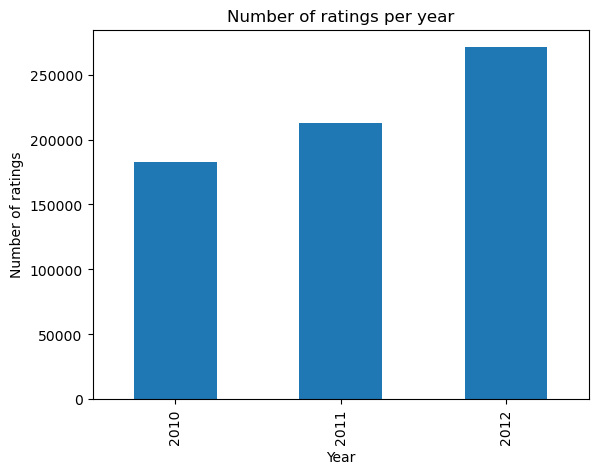

In [9]:
# Plot the distribution of the ratings per year
rb_ratings.date.dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of ratings per year')
plt.xlabel('Year')
plt.ylabel('Number of ratings')
plt.show()

In [47]:
# Join ratings and users on user_id to count the number of ratings per location
rb_ratings_per_location = rb_ratings.merge(rb_users[['user_id', 'location']], on='user_id')
rb_ratings_per_location = rb_ratings_per_location.groupby('location').count()

# Create a new column with the number of ratings per location
rb_ratings_per_location['count'] = rb_ratings_per_location['user_id']
rb_ratings_per_location = rb_ratings_per_location[['count']]

# Sort by the number of ratings
rb_ratings_per_location = rb_ratings_per_location.sort_values(by='count', ascending=False)
rb_ratings_per_location.head()


   


Denmark
Canada
United States, California
Sweden
Norway
Germany
Finland
Netherlands
England
United States, Illinois
Australia
United States, Pennsylvania
United States, Texas
United States, Florida
United States, Washington
United States, New Jersey
United States, New York
United States, Wisconsin
United States, Colorado
United States, Ohio
Italy
United States, Minnesota
Belgium
United States, Georgia
United States, Virginia
United States, Arizona
United States, North Carolina
United States, Maryland
New Zealand
Estonia
United States, Indiana
United States, Michigan
Hungary
United States, Oregon
Scotland
Croatia
United States, Missouri
Czech Republic
Poland
Japan
United States, Tennessee
Switzerland
United States, Iowa
Israel
Spain
United States, Massachusetts
Slovak Republic
Faroe Islands
United States, Idaho
France
United States, Kentucky
United States, Connecticut
United States, Alabama
Thailand
United States, New Hampshire
Ireland
United States, Kansas
Greece
United States, Nevada
U

In [66]:
# Filtering ratings so that users only come from countries with a certain number of ratings


# Making dictionary of ratings per country using previous dataframe for easier access
country_frequencies = {}
for country,count in rb_ratings_per_location.iterrows(): 
    count_parts = count.tolist()
    country_frequencies[country] = count_parts[0]
# print(country_frequencies)
    


MIN_THRESHOLD_FOR_USERS = 300000 # We only want to keep ratings where the users are in countries above this min threshold
filtered_rb_ratings = rb_ratings.copy() # Copying existing dataframe
for index, row in filtered_rb_ratings.iterrows():
    user_id = row['user_id']
    row_in_users = rb_users.loc[rb_users['user_id'] == user_id]
    if len(row_in_users['location'].tolist()) > 0:
        users_location = row_in_users['location'].tolist()[0]
        if country_frequencies[users_location] < MIN_THRESHOLD_FOR_USERS:
            filtered_rb_ratings.drop(index, inplace=True) # Drop in the filtered dataframe if it is below the expected value
filtered_rb_ratings.head()

KeyboardInterrupt: 